In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [142]:
train_data = pd.read_excel("TrainingData.xlsx")

In [144]:
train_data.shape

(34, 39)

In [145]:
train_data.isnull().sum()

Period                                 0
EQ                                     0
Social_Search_Impressions             10
Social_Search_Working_cost            10
Digital_Impressions                   11
Digital_Working_cost                  11
Print_Impressions.Ads40                1
Print_Working_Cost.Ads50               1
OOH_Impressions                       24
OOH_Working_Cost                      27
SOS_pct                                0
Digital_Impressions_pct               24
CCFOT                                  0
Median_Temp                            0
Median_Rainfall                        0
Fuel_Price                             0
Inflation                              0
Trade_Invest                           0
Brand_Equity                           0
Avg_EQ_Price                           0
Any_Promo_pct_ACV                      0
Any_Feat_pct_ACV                      23
Any_Disp_pct_ACV                      12
EQ_Base_Price                          0
Est_ACV_Selling 

In [146]:
train_data.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [147]:
train_data['period'] = train_data['Period'].map(lambda x:x[-1])

In [148]:
train_data['year'] = train_data['Period'].map(lambda x:x[:4])

In [149]:
train_data.drop(columns = ['Period'], inplace=True)

In [150]:
train_data.describe()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,34.000000,2.400000e+01,24.000000,2.300000e+01,23.000000,3.300000e+01,33.000000,1.000000e+01,7.000000e+00,34.000000,...,12.000000,12.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000
mean,323.714126,1.229424e+07,51957.191257,3.833919e+06,42576.886790,2.008683e+06,32298.947990,9.930678e+08,3.202352e+06,11.926924,...,46.059377,32.008333,102.146076,38.875958,44.441234,65.281623,2.116786e+06,491206.186838,0.101033,42.335193
std,121.512386,1.021964e+07,42730.005851,4.195661e+06,47739.241098,3.640760e+06,55891.752513,1.290923e+09,3.299834e+06,11.547587,...,23.453339,17.100583,8.806682,5.196502,2.978976,4.541603,3.923903e+05,190921.519843,0.098598,2.921126
min,130.937361,2.160000e+04,2006.674000,2.989220e+04,1800.344000,1.400000e-05,0.000015,2.880720e+04,3.505506e+02,0.102858,...,7.080951,2.200000,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
25%,238.093094,3.790024e+06,20550.501500,4.027655e+05,5787.389000,1.666492e-05,0.000020,2.213975e+07,1.919365e+05,1.626260,...,32.072282,23.100000,97.051358,35.735922,41.852452,62.279815,1.862576e+06,341256.702100,0.031307,40.448477
50%,292.629436,9.857390e+06,35200.696745,3.006588e+06,23205.988710,2.374541e+03,404.646896,5.313167e+07,3.113695e+06,10.404517,...,40.652666,35.100000,100.759645,37.346033,44.606922,64.901897,2.013858e+06,423234.196000,0.078852,42.941337
75%,445.078677,1.695319e+07,81174.671148,5.946668e+06,68823.001675,1.449305e+06,48695.386310,2.012685e+09,5.150618e+06,18.219558,...,54.696999,44.700000,105.313414,40.609072,45.690191,67.734576,2.395357e+06,624275.869825,0.135781,44.038246
max,546.053084,4.039739e+07,153276.592000,1.830051e+07,170507.762800,1.205852e+07,207179.200500,3.119656e+09,8.617309e+06,47.442188,...,100.000000,54.600000,121.889647,57.797794,50.753726,75.555801,2.867307e+06,856242.939400,0.430051,47.522960


In [151]:
train_data

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,period,year
0,504.784933,NaN,NaN,37148.2,2045.282000,NaN,NaN,NaN,NaN,7.446883,...,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563,1,2016
1,490.226477,NaN,NaN,50886.8,2370.584000,1.400000e-05,0.000015,NaN,NaN,11.677082,...,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301,2,2016
2,479.244686,NaN,NaN,253333.2,3180.888000,1.560000e-05,0.000017,NaN,NaN,0.102858,...,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115,3,2016
3,489.057428,NaN,NaN,3426239.0,13595.398000,1.624000e-05,0.000019,NaN,NaN,0.249055,...,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246,4,2016
4,477.031994,NaN,NaN,552197.8,3983.134000,1.649600e-05,0.000019,NaN,NaN,13.338804,...,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578,5,2016
5,487.855299,NaN,NaN,29892.2,1800.344000,1.659840e-05,0.000020,NaN,NaN,13.562212,...,99.796505,36.996437,44.943022,68.415943,2796949.720,806075.7642,0.029912,44.075674,6,2016
6,466.399281,NaN,NaN,6021768.0,7591.644000,1.663936e-05,0.000020,NaN,NaN,14.392305,...,101.096185,37.314308,43.358409,65.420869,2867306.933,828776.1488,0.021788,45.072822,7,2016
7,546.053084,NaN,NaN,1815307.2,7866.572000,1.665574e-05,0.000020,NaN,NaN,15.376127,...,94.654006,34.013304,41.356740,64.478960,2813494.081,789109.5698,0.093287,42.974524,8,2016
8,464.925607,NaN,NaN,153633.2,3579.130000,1.666230e-05,0.000020,NaN,NaN,22.932534,...,96.238963,37.377758,40.577016,63.264193,2441916.655,606656.5082,0.100700,42.760786,9,2016
9,357.648693,3919100.6,24839.81200,30331.0,23205.988710,1.666492e-05,0.000020,NaN,NaN,28.529493,...,105.031551,46.598751,44.631443,67.040049,2017353.844,421134.3688,0.025271,43.925962,0,2016


In [152]:
train_data.dtypes

EQ                                    float64
Social_Search_Impressions             float64
Social_Search_Working_cost            float64
Digital_Impressions                   float64
Digital_Working_cost                  float64
Print_Impressions.Ads40               float64
Print_Working_Cost.Ads50              float64
OOH_Impressions                       float64
OOH_Working_Cost                      float64
SOS_pct                               float64
Digital_Impressions_pct               float64
CCFOT                                 float64
Median_Temp                           float64
Median_Rainfall                       float64
Fuel_Price                            float64
Inflation                             float64
Trade_Invest                          float64
Brand_Equity                          float64
Avg_EQ_Price                          float64
Any_Promo_pct_ACV                     float64
Any_Feat_pct_ACV                      float64
Any_Disp_pct_ACV                  

In [153]:
train_data['period'] = train_data['period'].astype(int)

In [154]:
train_data['year'] = train_data['year'].astype(int)

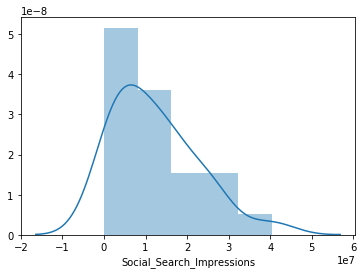

In [155]:
sns.distplot(train_data['Social_Search_Impressions'])

In [156]:
train_data.isnull().sum()

EQ                                     0
Social_Search_Impressions             10
Social_Search_Working_cost            10
Digital_Impressions                   11
Digital_Working_cost                  11
Print_Impressions.Ads40                1
Print_Working_Cost.Ads50               1
OOH_Impressions                       24
OOH_Working_Cost                      27
SOS_pct                                0
Digital_Impressions_pct               24
CCFOT                                  0
Median_Temp                            0
Median_Rainfall                        0
Fuel_Price                             0
Inflation                              0
Trade_Invest                           0
Brand_Equity                           0
Avg_EQ_Price                           0
Any_Promo_pct_ACV                      0
Any_Feat_pct_ACV                      23
Any_Disp_pct_ACV                      12
EQ_Base_Price                          0
Est_ACV_Selling                        0
pct_ACV         

In [157]:
train_data['Social_Search_Impressions'].fillna(train_data['Social_Search_Impressions'].mean(), 
                                                inplace = True)

In [158]:
train_data['Social_Search_Working_cost'].fillna(train_data['Social_Search_Working_cost'].mean(), 
                                                inplace = True)

In [159]:
train_data['Digital_Impressions'].replace(np.nan, train_data['Digital_Impressions'].mean(), 
                                                inplace = True)

In [160]:
train_data['Digital_Working_cost'].replace(np.nan, train_data['Digital_Working_cost'].mean(), 
                                                inplace = True)

In [161]:
train_data['Print_Impressions.Ads40'].replace(np.nan, train_data['Print_Impressions.Ads40'].mean(), 
                                                inplace = True)

In [162]:
train_data['Social_Search_Impressions'].replace(np.nan, train_data['Social_Search_Impressions'].mean(), 
                                                inplace = True)

In [163]:
train_data['Print_Working_Cost.Ads50'].replace(np.nan, train_data['Print_Working_Cost.Ads50'].mean(), 
                                                inplace = True)

In [164]:
train_data['Print_Working_Cost.Ads50'].replace(np.nan, train_data['Print_Working_Cost.Ads50'].mean(), 
                                                inplace = True)

In [165]:
train_data['OOH_Impressions'].replace(np.nan, train_data['OOH_Impressions'].mean(), 
                                                inplace = True)

In [166]:
train_data['OOH_Working_Cost'].replace(np.nan, train_data['OOH_Working_Cost'].mean(), 
                                                inplace = True)

In [167]:
train_data['Digital_Impressions_pct'].replace(np.nan, train_data['Digital_Impressions_pct'].mean(), 
                                                inplace = True)

In [168]:
train_data['Any_Feat_pct_ACV'].replace(np.nan, train_data['Any_Feat_pct_ACV'].mean(), 
                                                inplace = True)

In [169]:
train_data['Any_Disp_pct_ACV'].replace(np.nan, train_data['Any_Disp_pct_ACV'].mean(), 
                                                inplace = True)

In [170]:
train_data['Magazine_Impressions_pct'].replace(np.nan, train_data['Magazine_Impressions_pct'].mean(), 
                                                inplace = True)

In [171]:
train_data['TV_GRP'].replace(np.nan, train_data['TV_GRP'].mean(), 
                                                inplace = True)

In [172]:
train_data

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,period,year
0,504.784933,1.229424e+07,51957.191257,3.714820e+04,2045.282000,2.008683e+06,32298.947990,9.930678e+08,3.202352e+06,7.446883,...,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563,1,2016
1,490.226477,1.229424e+07,51957.191257,5.088680e+04,2370.584000,1.400000e-05,0.000015,9.930678e+08,3.202352e+06,11.677082,...,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301,2,2016
2,479.244686,1.229424e+07,51957.191257,2.533332e+05,3180.888000,1.560000e-05,0.000017,9.930678e+08,3.202352e+06,0.102858,...,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115,3,2016
3,489.057428,1.229424e+07,51957.191257,3.426239e+06,13595.398000,1.624000e-05,0.000019,9.930678e+08,3.202352e+06,0.249055,...,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246,4,2016
4,477.031994,1.229424e+07,51957.191257,5.521978e+05,3983.134000,1.649600e-05,0.000019,9.930678e+08,3.202352e+06,13.338804,...,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578,5,2016
5,487.855299,1.229424e+07,51957.191257,2.989220e+04,1800.344000,1.659840e-05,0.000020,9.930678e+08,3.202352e+06,13.562212,...,99.796505,36.996437,44.943022,68.415943,2796949.720,806075.7642,0.029912,44.075674,6,2016
6,466.399281,1.229424e+07,51957.191257,6.021768e+06,7591.644000,1.663936e-05,0.000020,9.930678e+08,3.202352e+06,14.392305,...,101.096185,37.314308,43.358409,65.420869,2867306.933,828776.1488,0.021788,45.072822,7,2016
7,546.053084,1.229424e+07,51957.191257,1.815307e+06,7866.572000,1.665574e-05,0.000020,9.930678e+08,3.202352e+06,15.376127,...,94.654006,34.013304,41.356740,64.478960,2813494.081,789109.5698,0.093287,42.974524,8,2016
8,464.925607,1.229424e+07,51957.191257,1.536332e+05,3579.130000,1.666230e-05,0.000020,9.930678e+08,3.202352e+06,22.932534,...,96.238963,37.377758,40.577016,63.264193,2441916.655,606656.5082,0.100700,42.760786,9,2016
9,357.648693,3.919101e+06,24839.812000,3.033100e+04,23205.988710,1.666492e-05,0.000020,9.930678e+08,3.202352e+06,28.529493,...,105.031551,46.598751,44.631443,67.040049,2017353.844,421134.3688,0.025271,43.925962,0,2016


In [173]:
train_data.columns

Index(['EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory', 'period', 'year'],
      dtype='object')

In [174]:
name_of_features = ['Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory', 'period', 'year']

In [175]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [176]:
X = train_data.drop(columns = ['EQ'], axis = 1)

In [177]:
y = train_data['EQ']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Linear Regression

In [179]:
lr = LinearRegression(normalize=True, n_jobs=-1)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [180]:
np.sqrt( mean_squared_error(y_test, y_predict) )

42.97713211511292

In [181]:
mean_absolute_percentage_error(y_test, y_predict)

14.579147667924918

### Ridge

In [182]:
ridge = RidgeCV(normalize=True)
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)

In [183]:
np.sqrt( mean_squared_error(y_test, y_predict) )

22.39538939415809

In [184]:
mean_absolute_percentage_error(y_test, y_predict)

5.706504459123065

### Lasso

In [185]:
lasso = LassoCV(normalize=True)
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)

In [186]:
np.sqrt( mean_squared_error(y_test, y_predict) )

26.412657354051742

In [187]:
mean_absolute_percentage_error(y_test, y_predict)

8.427790859049473

In [189]:
coefficients_df = pd.DataFrame({'value_of_coefficients':lasso.coef_, 'Name_of_features':name_of_features})

In [190]:
coefficients_df

,value_of_coefficients,Name_of_features
0,-0.000000,Social_Search_Impressions
1,-0.000000,Social_Search_Working_cost
2,-0.000000,Digital_Impressions
3,-0.000188,Digital_Working_cost
4,0.000000,Print_Impressions.Ads40
5,0.000000,Print_Working_Cost.Ads50
6,-0.000000,OOH_Impressions
7,-0.000000,OOH_Working_Cost
8,-0.000000,SOS_pct
9,0.000000,Digital_Impressions_pct


### RandomForest Regressor

In [191]:
rf = RandomForestRegressor(n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [192]:
np.sqrt( mean_squared_error(y_test, y_predict) )

44.537281072994034

In [193]:
mean_absolute_percentage_error(y_test, y_predict)

17.319637238397103

### Test data

In [201]:
test_data = pd.read_excel("TestData.xlsx")

In [202]:
test_data

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2017 - Period:1,392.326431,1314877.0,7398.658606,NaN,NaN,1.666662e-05,0.000020,NaN,NaN,...,NaN,NaN,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624048
1,2017 - Period:6,300.922056,21830378.8,98309.553500,7324082.2,111398.20310,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,...,39.492174,32.1,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
2,2018 - Period:1,247.315476,2829923.6,9938.170001,NaN,NaN,1.484088e+04,1618.587524,NaN,NaN,...,NaN,NaN,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
3,2018 - Period:6,278.317524,15378465.6,58338.893120,5454810.0,74906.49837,1.519706e+02,50.580880,NaN,NaN,...,NaN,NaN,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608
4,2018 - Period:11,161.529279,285755.2,5232.968000,63120.8,NaN,1.929363e+06,24347.693170,1.693330e+09,2.115462e+06,...,NaN,NaN,100.734978,37.813696,45.792891,65.671466,1628818.628,329510.9938,0.006405,40.955281


In [203]:
test_data['period'] = test_data['Period'].map(lambda x:x[-1])

In [204]:
test_data['year'] = test_data['Period'].map(lambda x:x[:4])

In [205]:
test_data.drop(columns = ['Period'], inplace=True)

In [206]:
test_data['period'] = test_data['period'].astype(int)

In [207]:
test_data['year'] = test_data['year'].astype(int)

In [208]:
test_data.isna().sum()

EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   2
Digital_Working_cost                  3
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       3
OOH_Working_Cost                      3
SOS_pct                               0
Digital_Impressions_pct               2
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      4
Any_Disp_pct_ACV                      2
EQ_Base_Price                         0
Est_ACV_Selling                       0
pct_ACV                               0


In [209]:
test_data['Digital_Impressions'].fillna(test_data['Digital_Impressions'].mean(), 
                                                inplace = True)

In [210]:
test_data['Digital_Working_cost'].fillna(test_data['Digital_Working_cost'].mean(), 
                                                inplace = True)

In [211]:
test_data['OOH_Impressions'].fillna(test_data['OOH_Impressions'].mean(), 
                                                inplace = True)

In [212]:
test_data['OOH_Working_Cost'].fillna(test_data['OOH_Working_Cost'].mean(), 
                                                inplace = True)

In [213]:
test_data['Digital_Impressions_pct'].fillna(test_data['Digital_Impressions_pct'].mean(), 
                                                inplace = True)

In [214]:
test_data['Any_Feat_pct_ACV'].fillna(test_data['Any_Feat_pct_ACV'].mean(), 
                                                inplace = True)

In [215]:
test_data['Any_Disp_pct_ACV'].fillna(test_data['Any_Disp_pct_ACV'].mean(), 
                                                inplace = True)

In [216]:
test_data['Magazine_Impressions_pct'].fillna(test_data['Magazine_Impressions_pct'].mean(), 
                                                inplace = True)

In [217]:
test_data['TV_GRP'].fillna(test_data['TV_GRP'].mean(), 
                                                inplace = True)

In [220]:
X_test_true = test_data.drop(columns = ['EQ'], axis = 1)

In [221]:
y_test_true = test_data['EQ']

### For this dataset best model is Ridge

In [222]:
y_predict = ridge.predict(X_test_true)

In [223]:
mean_absolute_percentage_error(y_test_true, y_predict)

14.34018762773006